<a href="https://colab.research.google.com/github/grosa1/hands-on-ml-tutorials/blob/master/tutorial_3/text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 3 - Text classification

<img src="https://monkeylearn.com/static/img/text-classification/text_process_training.png" height="300" />
<img src="https://monkeylearn.com/static/img/text-classification/text_process_prediction.png" height="300" />

**Dataset description**

`id % numeric` id

`app % string`  app package name

`version % numeric` app version

`rating % numeric` rating of the review in terms of stars (1-5)

`date % numeric` timestamp of review

`device % string` device used for submitting review

`user % string` the user who made the review

`review % string` review text

`category % string` review category

The dataset used in this example is from CLAP [1]. For educational purpose, only reviews are used as features. In the original work, they use as features:
* bag of words of reviews text
* n-grams of reviews text
* user rating
* lenght of the reviews text
* app category (tagged manually)

Next, as pre-processing step:
1. tokenization
2. removing negated terms
3. stop-words
4. stemming
5. unifying synonyms
6. n-grams extraction

> ### Loading the dataset

In [0]:
import pandas as pd
import numpy as np

In [0]:
data = pd.read_csv('rq1-complete-data.csv', index_col='id')
data

,app,version,rating,date,device,user,review,category
id,,,,,,,,
1,com.androtiyas.dragonvirtual,1.08,5,1387756426967,?,Alexis Gonzalez,cute!!!! the game is just to cute!!!! :3,OTHER
2,com.androtiyas.dragonvirtual,1.1,4,1390090741168,Galaxy Precedent,A Google User,? well its ok but not bad nor is it great,OTHER
3,com.androtiyas.dragonvirtual,?,1,1387746296815,Toshiba AT100,Reyna We,? have no idea how to feed dragon and boooorrr...,OTHER
4,com.androtiyas.dragonvirtual,1.06,2,1386518193950,?,mariah harris,when i play games it reboots about every third...,BUG
5,com.androtiyas.dragonvirtual,1.06,5,1386915595583,?,Wren Brown,love my dragon have fun! yahoooey! godbless,OTHER
...,...,...,...,...,...,...,...,...
9996,za.co.fnb.connect.itt,1.05.25,1,1373886652472,Galaxy Tab 7.0 Plus,Xolane Ripinga,Bad update The update has messed up the app no...,BUG
9997,za.co.fnb.connect.itt,1.05.25,1,1375652118422,?,A Google User,Try being a banking app not a what's up / vibe...,USABILITY
9998,za.co.fnb.connect.itt,1.05.25,2,1367399209270,?,A Google User,? I already get the messages. ... now is dupli...,FEATURE


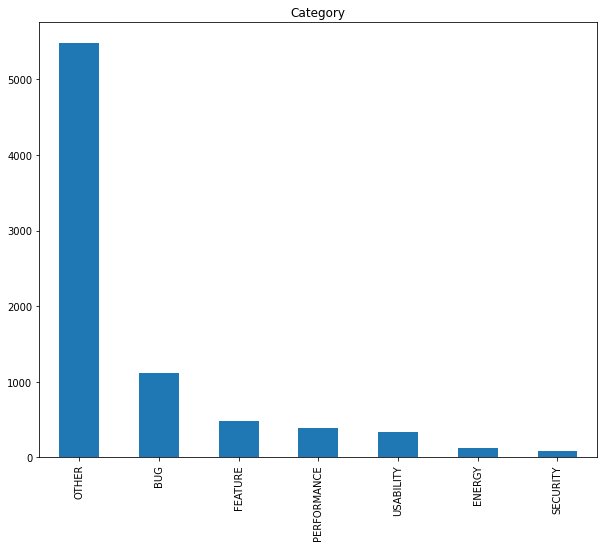

In [0]:
p_bar = data['category'].value_counts().plot(kind='bar', title='Category', figsize=(10,8));

In [0]:
data['category'].value_counts()

OTHER          5483
BUG            1118
FEATURE         484
PERFORMANCE     388
USABILITY       334
ENERGY          119
SECURITY         84
Name: category, dtype: int64

> ##### Encoding labels

In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data['category'] = le.fit_transform(data['category'])
data['category'].value_counts()

3    5483
0    1118
2     484
4     388
6     334
1     119
5      84
Name: category, dtype: int64

> ##### The label encoder also does the reverse transformation:

In [0]:
le.inverse_transform(data['category'])

array(['OTHER', 'OTHER', 'OTHER', ..., 'FEATURE', 'FEATURE', 'BUG'],
      dtype=object)

> ### Text representation

Define "X" and "y":

In [0]:
X = data['review']
y = data['category']

> ##### Text pre-processing function

In [0]:
import nltk
nltk.download('punkt') # for tokenization

from nltk.corpus import stopwords
nltk.download('stopwords')

from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


We define a `process_text` function that will be applied by text vectorizer:

In [0]:
def process_text(raw_text):
  clean_txt = list()
  ps = PorterStemmer()
  stop_words = set(stopwords.words("english"))
  tokens = nltk.word_tokenize(raw_text)
  for t in tokens:
      if t.isalpha() and (t not in stop_words):
          clean_txt.append(ps.stem(t.lower()))

  return clean_txt

For example, if we directly apply the function to the reviews:

In [0]:
X.apply(process_text)

id
1                                       [cute, game, cute]
2                                   [well, ok, bad, great]
3             [idea, feed, dragon, boooorrrriiiiiinnhgggg]
4        [play, game, reboot, everi, third, time, row, ...
5                  [love, dragon, fun, yahoooey, godbless]
                               ...                        
9996     [bad, updat, the, updat, mess, app, phone, tab...
9997     [tri, bank, app, viber, as, bank, app, ok, mak...
9998     [i, alreadi, get, messag, duplic, add, option,...
9999     [function, app, pretti, decent, app, would, ex...
10000    [forc, close, upon, attempt, use, almost, feat...
Name: review, Length: 8010, dtype: object

For pre-processing and classification, the best approach is to build a pipeline. For example:

```
from sklearn.pipeline import Pipeline

text_cl = Pipeline([('vect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('cl', RandomForestClassifier())])
pred = text_cl.fit(train_x, target)
```

The text normalization and tokenization can also be done automatically by the `CountVectorizer`. For example:

```
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

cv = CountVectorizer(min_df=2, max_df=0.7, stop_words=stopwords.words('english'), ngram_range=(1,2), tokenizer=token.tokenize)
x_cv = cv.fit_transform(X).toarray()
```

In our example, we proceed step by step.

> ##### Count vectorizer

With `CountVectorize` we obtain word count Vector, where every column is a term from the corpus, and every cell represents the frequency count of each term in each document.

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
cv = CountVectorizer(min_df=2, max_df=0.7, ngram_range=(1,2), analyzer=process_text)
x_cv = cv.fit_transform(X).toarray()

In [0]:
cv.get_feature_names()

['a',
 'aap',
 'abartili',
 'abil',
 'abl',
 'absolut',
 'accept',
 'access',
 'accessori',
 'accid',
 'accident',
 'accord',
 'account',
 'accur',
 'accuraci',
 'ace',
 'acer',
 'achiev',
 'across',
 'act',
 'action',
 'activ',
 'actual',
 'ad',
 'ada',
 'add',
 'addict',
 'addit',
 'address',
 'adjust',
 'admin',
 'adob',
 'ador',
 'adult',
 'advanc',
 'advantag',
 'adventur',
 'advert',
 'advertenti',
 'advertis',
 'advic',
 'advis',
 'adwar',
 'aesthet',
 'affect',
 'afford',
 'after',
 'age',
 'agent',
 'aggrav',
 'ago',
 'agood',
 'agre',
 'ah',
 'ai',
 'aight',
 'aim',
 'air',
 'ako',
 'al',
 'alam',
 'alarm',
 'album',
 'alert',
 'all',
 'allah',
 'allot',
 'allow',
 'allway',
 'almost',
 'alon',
 'along',
 'alot',
 'alreadi',
 'alright',
 'also',
 'altern',
 'although',
 'alway',
 'am',
 'amaz',
 'amazin',
 'amazingli',
 'amd',
 'american',
 'amit',
 'among',
 'amount',
 'an',
 'analys',
 'and',
 'andriod',
 'android',
 'ang',
 'angel',
 'angela',
 'angl',
 'angri',
 'ani',
 '

In [0]:
x_cv

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [0]:
x_cv.shape

(8010, 2788)

> ##### *Term Frequency - Inverse Document Frequency (TF-IDF)* 

TF-IDF is a score that represents the relative importance of a term in the document and the entire corpus.

In [0]:
from sklearn.feature_extraction.text import TfidfTransformer

In [0]:
tfidf_converter = TfidfTransformer()
x_tf = tfidf_converter.fit_transform(x_cv).toarray()

> ##### Split the dataset in train and test:

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x_tf, y, test_size=0.3, random_state=1)

In [0]:
print(x_train.shape, y_train.shape)

(5607, 2788) (5607,)


In [0]:
print(x_test.shape, y_test.shape)

(2403, 2788) (2403,)


> ### Over-sampling

> ##### *SMOTE (Synthetic Minority Over-sampling Technique)* 
N.B. This is not the best technique to use when dealing with textual data, as explained [here](https://datascience.stackexchange.com/questions/27671/how-do-you-apply-smote-on-text-classification)

SMOTE is an over-sampling method. It creates synthetic samples of the minority class. We use `imblearn` python package to over-sample the minority classes:

In [0]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


By default, the sampling method is `not majority`



In [0]:
smote = SMOTE() 
x_smote, y_smote = smote.fit_resample(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [0]:
np.unique(y_smote, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6]),
 array([3835, 3835, 3835, 3835, 3835, 3835, 3835]))

> ### Prediction

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def print_metrics(y_test, y_pred):
    print('1. Accuracy: {}'.format(round(accuracy_score(y_test, y_pred), 2)))
    print('2. Precision: {}'.format(round(precision_score(y_test, y_pred, average='macro'), 2)))
    print('3. Recall {}'.format(round(recall_score(y_test, y_pred, average='macro'), 2)))
    print('4. F1 score: {}'.format(round(f1_score(y_test, y_pred, average='macro'), 2)))
    print('\n5. Confusion Matrix \n\n{}'.format(pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])))

In [0]:
# Training
model = RandomForestClassifier().fit(x_smote, y_smote)

# Prediction
y_pred = model.predict(x_test)

Inverse encoding of labels using `LabelEncoder`:

In [0]:
y_pred_parsed = le.inverse_transform(y_pred)
y_test_parsed = le.inverse_transform(y_test)

For each category we have the values of `precision`, `recall` and `f1-score`. In this way we can evaluate the model performance.

In [0]:
print(classification_report(y_test_parsed, y_pred_parsed))

              precision    recall  f1-score   support

         BUG       0.83      0.79      0.81       340
      ENERGY       0.79      0.84      0.82        37
     FEATURE       0.70      0.77      0.73       149
       OTHER       0.92      0.96      0.94      1648
 PERFORMANCE       0.78      0.55      0.64       108
    SECURITY       0.86      0.64      0.73        28
   USABILITY       0.73      0.41      0.52        93

    accuracy                           0.88      2403
   macro avg       0.80      0.71      0.74      2403
weighted avg       0.88      0.88      0.87      2403



In this case, we have the average values of the metrics . The average is `macro` which means that is a simple average between the values of all classes.

In [0]:
print_metrics(y_test_parsed, y_pred_parsed)

1. Accuracy: 0.88
2. Precision: 0.8
3. Recall 0.71
4. F1 score: 0.74

5. Confusion Matrix 

Predicted    BUG  ENERGY  FEATURE  OTHER  PERFORMANCE  SECURITY  USABILITY
Actual                                                                    
BUG          268       3        9     45           12         0          3
ENERGY         0      31        0      6            0         0          0
FEATURE        2       0      114     29            1         0          3
OTHER         15       3       29   1588            4         3          6
PERFORMANCE   20       1        2     26           59         0          0
SECURITY       3       0        0      5            0        18          2
USABILITY     13       1        9     32            0         0         38


> ### Cross-validation

We apply a r*andom permutation cross-validator*, where the folds are first shuffled and then split into a pair of train and test sets.

**N.B.** random splits do not guarantee that all folds will be different!

In [0]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [0]:
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
cross_val_score(model, x_tf, y, cv=cv, scoring='f1_macro')

array([0.65243749, 0.66018093, 0.65940587, 0.67941142, 0.66129744,
       0.6595624 , 0.66130428, 0.66857227, 0.67672337, 0.68805779])

> ### References
- [1] Scalabrino, S., Bavota, G., Russo, B., Di Penta, M., & Oliveto, R. (2017). Listening to the crowd for the release planning of mobile apps. IEEE Transactions on Software Engineering, 45(1), 68-86.

> ### Useful links
- [CLAP replication package](https://dibt.unimol.it/reports/clap/)
- [scikit-learn tutorial on text classification](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html)
- [Example of scikit-learn pipeline](https://nbviewer.jupyter.org/github/rasbt/python-machine-learning-book/blob/master/code/ch06/ch06.ipynb#Combining-transformers-and-estimators-in-a-pipeline)
- [SMOTE doc](https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html)
- [Scikit-learn cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html)
-[Tutorial on Scikit-learn vectorizers](https://towardsdatascience.com/hacking-scikit-learns-vectorizers-9ef26a7170af)